In [1]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import xarray as xr
import rockhound as rh
from rockhound.slab2 import ZONES
import pygmt
import sys
sys.path.insert(1, '/Users/andrew/Documents/python/pygplates_rev28_python37_MacOS64')
import pygplates
import cartopy.crs as ccrs
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

%matplotlib inline


In [2]:
def find_with_list(myList, target):
    inds = []
    for i in range(len(myList)):
        if myList[i] == target:
            inds += i,
    return inds

In [3]:
df = pd.read_csv('/Users/Andrew/Documents/Data/Merdith_sub_zones/syracuse_thermal/Table_2_sub_parameters.csv')

In [4]:

# Options for Model are:
#  - D80
#  - X25
#  - W1300
#  - T550
MODEL = 'D80'

SlabDir = '/Users/Andrew/Documents/Data/Merdith_sub_zones/syracuse_thermal/Syracuse++_supp_Material/models/%s' % MODEL

f=[]
for(dirpath,dirnames,filenames) in walk(SlabDir):
    f.extend(filenames)
    break
f.sort()
#print f

Shift=0

fig = plt.figure(figsize=(12,12),dpi=300)

MagnetiteIsoDepths = []
SurfaceCurieIsoDepths = []

#55 subduction zones
#for j in np.arange(0,5):#len(filenames)):
#
#    FNAME = f[j+50]
#
#    fid=open(SlabDir+'/'+FNAME, 'r');
#
#    SurfaceArray = [];
#    MohoArray = [];
#
#    for line in fid:
#        #strip removes the '\n' at the end
#        tline = line.strip()
#        #print(tline[0])
#        # Case where line contains the top surface of slab
#        if '0' in tline[0]:
#            tline = list(map(float, tline.split()))
#            SurfaceArray.append(tline)
#        # Case where line contains weird write statement text,
#        # followed by values on next line
#        #elif '7' in tline[0]:
#        #    continue  # can skip this line, go to next
#        else:
#            tline = list(map(float, tline.split()))
#            MohoArray.append(tline)
#
#    SurfaceArray = np.asarray(SurfaceArray)
#    MohoArray = np.asarray(MohoArray)
#    #print MohoArray[:,2]
#
#    #MohoInterpolator = interp1d(np.array(Moho)[:,0],np.array(Moho)[:,1],kind='linear',bounds_error=False)
#
#    SurfaceCurieInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
#    try:
#        SurfaceCurieIsoDepth = SurfaceCurieInterpolator(550.)
#    except:
#        SurfaceCurieIsoDepth = np.nan
#    MohoCurieInterpolator = interp1d(MohoArray[:,3],MohoArray[:,2],kind='linear')
#    try:
#        MohoCurieIsoDepth = MohoCurieInterpolator(550.)
#    except:
#        MohoCurieIsoDepth = np.nan
#    MagnetiteInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
#    try:
#        MagnetiteIsoDepth = MagnetiteInterpolator(200.)
#    except:
#        MagnetiteIsoDepth = np.nan
#
#    plt.subplot(2,5,j+1)
#    plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k')
#    plt.plot(MohoArray[:,1],MohoArray[:,2],'b')
#    plt.scatter(SurfaceArray[:,1]+15,SurfaceArray[:,2],10,c=SurfaceArray[:,3],\
#                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
#    plt.scatter(MohoArray[:,1]-15,MohoArray[:,2],10,c=MohoArray[:,3],\
#                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
#    ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
#    ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
#    ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
#    #caxis([100,800])
#    #set(gca,'ydir','reverse')
#    if j > 49:   # If subplot is at bottom, print the xlabel
#        plt.xlabel('Distance From Trench (km)')
#    if j in np.arange(0,55,5):  # if subplot is in left-most column, print ylabel
#        plt.ylabel('Depth (km)')
#    plt.gca().set_xlim([0,600])
#    plt.gca().set_ylim([0,300])
#    plt.gca().invert_yaxis()
#    plt.title(str(j) + ' ' + FNAME)
#
#    ci0s = str(np.round(MagnetiteIsoDepth))+' km'
#    ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
#    ci2s = str(np.round(MohoCurieIsoDepth))+' km'
#    lg=plt.legend([ci0,ci1,ci2],\
#        [ci0s,ci1s,ci2s],\
#        loc=3,fontsize=9);
#    #lg.draw_frame(False)
#    plt.tight_layout()
#
#    SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
#    MagnetiteIsoDepths.append(MagnetiteIsoDepth)
##[left, bottom, width, height]
#cax = fig.add_axes([0, 0.4, 1, 0.04])
#cbar = plt.colorbar(cax=cax, orientation='horizontal')
#cbar.set_label('Temperature (°C)')

<Figure size 3600x3600 with 0 Axes>

In [5]:
# Fetch all Slab2 subduction zones and add them inside a list
subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))
# Get min and max values of the subducting plates' depths
vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])


In [6]:
#Load sample grid and point datasets, use rockhound
SAM = rh.fetch_slab2('south_america')
IZB = rh.fetch_slab2('izu_bonin')
SJV = rh.fetch_slab2('sumatra_java')
CAS = rh.fetch_slab2('cascadia')
HEL = rh.fetch_slab2('hellenic')
CAL = rh.fetch_slab2('calabria')
RYU = rh.fetch_slab2('ryukyu')
JAP = rh.fetch_slab2('kamchatka')
#get depth
grid = SAM.depth
grid_uncertainty = SAM.depth_uncertainty

In [7]:
#here we define our cross section, we have 40 points, some will returns nans though
#Chile: [-25,-25], [280,300]
#Bonin: [30,30], [160,120]
#Peru: [-8,-8], [275,295]
#sumutra-java: [-10,2],[98,107]
#CAS: [40,50], [220, 240]
#CAL:[37,41],[20,10]
#RYU:[31,37],[135,130]
#JAP:[41,48],[148,130]
#lat = [-25]*40
#lon = np.linspace(280, 300, 40)
steps = 100
lat = np.linspace(-25,-25, int(steps))
lon = np.linspace(280,300, int(steps))
#pygmt track needs lon/lat as separate columns in pandas dataframe
d = { 'lon': lon,'lat': lat}
points = pd.DataFrame(data=d)

# Sample the sub zone using grdtrack. It returns a dataframe with a new column and the results
track = pygmt.grdtrack(points=points, grid=grid, newcolname='depth')
track_uncertain = pygmt.grdtrack(points=points, grid=grid_uncertainty, newcolname='depth_uncertainty')
#the df will contain some NaNs that we want to filtertrack
track_dropna = track.dropna()
track_uncertain_dropna = track_uncertain.dropna()

In [8]:
#use haversine formula to convert to km
#get distance, equally spaced so we can define at the start
lat1 = track_dropna['lat'].values[0]
lat2 = track_dropna['lat'].values[1]
lon1 = track_dropna['lon'].values[0]
lon2 = track_dropna['lon'].values[1]
# convert decimal degrees to radians 
lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

# haversine formula 
dlon = lon2 - lon1
dlat = lat2 - lat1 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2

c = 2 * np.arcsin(np.sqrt(a)) 
r = 6371 # Radius of earth in kilometers. Use 3956 for miles

distance = c*r

#get the incremental range
distance_range = []
for i in range(track_dropna['depth'].count()):

    distance_range.append(i*distance)


In [9]:
arcs = []
f.sort()
for file in f:
    arcs.append(file.split('.')[0])

In [10]:
input_lat = np.mean(lat)
input_lon = np.mean(lon)
if input_lon > 180:
    input_lon = input_lon-360
#get closest based on lat
df_sort = df.iloc[(df['Lat']-int(input_lat)).abs().argsort()[:10]]
#now cross check for long
df_closest = df_sort.iloc[(df_sort['Lon']-int(input_lon)).abs().argsort()[:1]]
print(df_closest['Name'])
#to get index
closest_index = df_closest.index.tolist()

index_of_closest = find_with_list(arcs, df_closest['Name'].values[0])


7    C_Chile_gap
Name: Name, dtype: object


In [11]:
#get data of our closest match
FNAME = f[index_of_closest[0]]

fid=open(SlabDir+'/'+FNAME, 'r');

SurfaceArray = [];
MohoArray = [];

for line in fid:
    #strip removes the '\n' at the end
    tline = line.strip()
    #print(tline[0])
    # Case where line contains the top surface of slab
    if '0' in tline[0]:
        tline = list(map(float, tline.split()))
        SurfaceArray.append(tline)
    # Case where line contains weird write statement text,
    # followed by values on next line
    #elif '7' in tline[0]:
    #    continue  # can skip this line, go to next
    else:
        tline = list(map(float, tline.split()))
        MohoArray.append(tline)

SurfaceArray = np.asarray(SurfaceArray)
MohoArray = np.asarray(MohoArray)
#print MohoArray[:,2]

#MohoInterpolator = interp1d(np.array(Moho)[:,0],np.array(Moho)[:,1],kind='linear',bounds_error=False)

SurfaceCurieInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
try:
    SurfaceCurieIsoDepth = SurfaceCurieInterpolator(550.)
except:
    SurfaceCurieIsoDepth = np.nan
MohoCurieInterpolator = interp1d(MohoArray[:,3],MohoArray[:,2],kind='linear')
try:
    MohoCurieIsoDepth = MohoCurieInterpolator(550.)
except:
    MohoCurieIsoDepth = np.nan
MagnetiteInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
try:
    MagnetiteIsoDepth = MagnetiteInterpolator(200.)
except:
    MagnetiteIsoDepth = np.nan

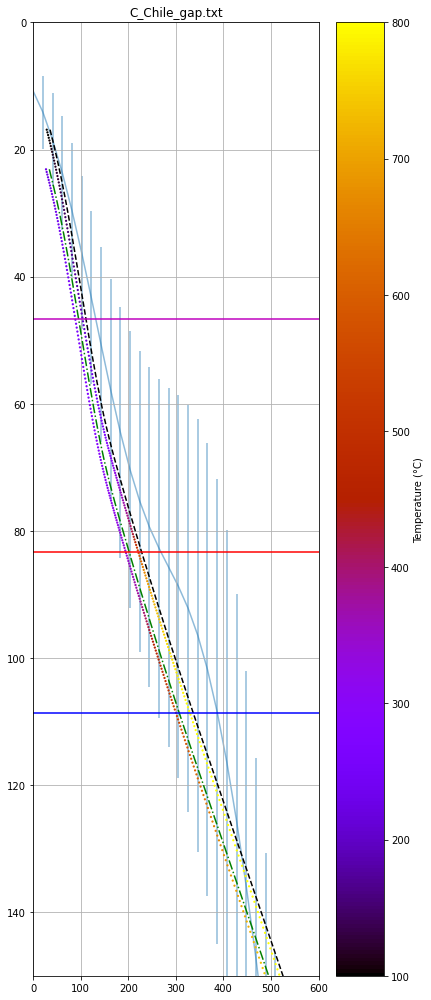

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,14))
plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k',ls='--', zorder=2)
plt.plot(MohoArray[:,1],MohoArray[:,2],'g',ls='-.', zorder=2)
plt.scatter(SurfaceArray[:,1]-7,SurfaceArray[:,2],5,c=SurfaceArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)
plt.scatter(MohoArray[:,1]-7,MohoArray[:,2],5,c=MohoArray[:,3],\
            cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800, zorder=2)

#plt.scatter(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
#plt.plot(np.asarray(distance_range),
#            track_dropna['depth'].values*-.001)
plt.errorbar(np.asarray(distance_range),
            track_dropna['depth'].values*-.001,
            yerr=track_uncertain_dropna['depth_uncertainty'].values*-.001,
            alpha=0.5, zorder=1)


ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
#caxis([100,800])
#set(gca,'ydir','reverse')
plt.gca().set_xlim([0,600])
plt.gca().set_ylim([0,150])
plt.gca().invert_yaxis()
plt.title(FNAME)

#ci0s = str(np.round(MagnetiteIsoDepth))+' km'
#ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
#ci2s = str(np.round(MohoCurieIsoDepth))+' km'
#lg=plt.legend([ci0,ci1,ci2],\
#    [ci0s,ci1s,ci2s],\
#    loc=3,fontsize=9);
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)')
plt.tight_layout()
plt.grid()
SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
MagnetiteIsoDepths.append(MagnetiteIsoDepth)
#[left, bottom, width, height]
